In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Loading dataset
df_police = pd.read_csv('Deaths_by_Police_US.csv', encoding='ISO-8859-1')
df_hh = pd.read_csv('Median_Household_Income_2015.csv', encoding='ISO-8859-1')
df_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding='ISO-8859-1')
df_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding='ISO-8859-1')
df_racebycity = pd.read_csv('Share_of_Race_By_City.csv', encoding='ISO-8859-1')

# Data Pre-processing

## Death by Police Data Exploration

In [3]:
#Showing the first five of data
df_police.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False


In [4]:
#Describing simple statistic of data
df_police.describe()

,id,age
count,2535.000000,2458.000000
mean,1445.731755,36.605370
std,794.259490,13.030774
min,3.000000,6.000000
25%,768.500000,26.000000
50%,1453.000000,34.000000
75%,2126.500000,45.000000
max,2822.000000,91.000000


In [5]:
#Checking the datatype of each feature
df_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

Note: Data yang diubah date, age

In [6]:
#Checking the NaN Value of each feature
df_police.isna().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [7]:
#Checking the duplicate value of each feature
df_police.duplicated().sum()

0

In [8]:
#Identifying the NaN value from each Feature in Police Dataset
police_nan = df_police[df_police.isna().any(axis=1)]
police_nan.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
59,110,William Campbell,25/01/15,shot,gun,59.0,M,NaN,Winslow,NJ,False,attack,Not fleeing,False
124,584,Alejandro Salazar,20/02/15,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
241,244,John Marcell Allen,30/03/15,shot,gun,54.0,M,NaN,Boulder City,NV,False,attack,Not fleeing,False
266,534,Mark Smith,09/04/15,shot and Tasered,vehicle,54.0,M,NaN,Kellyville,OK,False,attack,Other,False
340,433,Joseph Roy,07/05/15,shot,knife,72.0,M,NaN,Lawrenceville,GA,True,other,Not fleeing,False


## Households

In [9]:
df_hh.head(3)

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575


In [10]:
df_hh.describe()

,Geographic Area,City,Median Income
count,29322,29322,29271
unique,51,24249,14592
top,PA,Franklin city,(X)
freq,1762,16,1113


In [11]:
df_hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


Note: Median Income convert into int64

In [12]:
df_hh.isna().sum()

Geographic Area     0
City                0
Median Income      51
dtype: int64

In [13]:
df_hh.duplicated().sum()

0

## Highschool

In [14]:
df_hs.head(3)

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9


In [15]:
df_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [16]:
df_hs.describe()

,Geographic Area,City,percent_completed_hs
count,29329,29329,29329
unique,51,24255,728
top,PA,Franklin city,100
freq,1762,16,1301


In [17]:
df_hs.isna().sum()

Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

In [18]:
df_hs.duplicated().sum()

0

## Poverty

df_poverty.head(3)

In [19]:
df_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [20]:
df_poverty.isna().sum()

Geographic Area    0
City               0
poverty_rate       0
dtype: int64

In [21]:
df_poverty.duplicated().sum()

0

## Race by City

In [22]:
df_racebycity.head(3)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3


In [23]:
df_racebycity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [24]:
df_racebycity.describe()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
count,29268,29268,29268,29268,29268,29268,29268
unique,51,24219,997,926,628,409,956
top,PA,Franklin city,100,0,0,0,0
freq,1764,16,1051,6587,6930,8537,2489


In [25]:
df_racebycity.isna().sum()

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

In [26]:
df_racebycity.duplicated().sum()

0

# Data Manipulation

In [27]:
# Changing date to datetime data type in Police dataset
df_police['date'] = pd.to_datetime(df_police['date'],dayfirst=True, errors='raise')

C:\Users\chesa\AppData\Local\Temp\ipykernel_20476\4258800663.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_police['date'] = pd.to_datetime(df_police['date'],dayfirst=True, errors='raise')


In [28]:
#Filling the Nan Value in feature 'age' with mean or average of age
df_police['age'] = df_police['age'].fillna(df_police['age'].mean())

In [29]:
#Changing age data type from float to int
df_police['age'] = df_police['age'].astype(int)

In [30]:
#Filling the NaN Value in race feature with categorial datatype
df_police['race'].fillna('U', inplace=True)

In [31]:
#Filling the NaN Value in feature flee feature with categorial datatype
df_police['flee'].fillna('Unknown', inplace=True)

In [32]:
#Filling the NaN Value in feature armed feature with categorial datatype
df_police['armed'].fillna('Unknown', inplace=True)

In [33]:
# Joining table
df_country = df_hh[['City', 'Geographic Area']]
df_country = pd.concat([df_country, df_hh['Median Income'],df_hs['percent_completed_hs'],df_poverty['poverty_rate'], df_racebycity[['share_white','share_black', 'share_native_american', 'share_asian', 'share_hispanic']]], join='inner', axis=1)
df_country.head(5)

,City,Geographic Area,Median Income,percent_completed_hs,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,Abanda CDP,AL,11207,21.2,78.8,67.2,30.2,0,0,1.6
1,Abbeville city,AL,25615,69.1,29.1,54.4,41.4,0.1,1,3.1
2,Adamsville city,AL,42575,78.9,25.5,52.3,44.9,0.5,0.3,2.3
3,Addison town,AL,37083,81.4,30.7,99.1,0.1,0,0.1,0.4
4,Akron town,AL,21667,68.6,42,13.2,86.5,0,0,0.3


In [34]:
#Checking the NaN Value
df_country.isna().sum()

City                      0
Geographic Area           0
Median Income            40
percent_completed_hs      0
poverty_rate              0
share_white               0
share_black               0
share_native_american     0
share_asian               0
share_hispanic            0
dtype: int64

In [35]:
median_nan = df_country[df_country.isna().any(axis=1)]
median_nan.head(3)

,City,Geographic Area,Median Income,percent_completed_hs,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
29119,Albany CDP,WY,NaN,89,8,94.4,0.3,0.8,0.2,7.6
29121,Alcova CDP,WY,NaN,88,22.4,93.7,0.8,3.9,0,0.8
29123,Alpine Northeast CDP,WY,NaN,89.7,6.3,94.4,0.5,0.5,0,5.6


In [36]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   City                   29268 non-null  object
 1   Geographic Area        29268 non-null  object
 2   Median Income          29228 non-null  object
 3   percent_completed_hs   29268 non-null  object
 4   poverty_rate           29268 non-null  object
 5   share_white            29268 non-null  object
 6   share_black            29268 non-null  object
 7   share_native_american  29268 non-null  object
 8   share_asian            29268 non-null  object
 9   share_hispanic         29268 non-null  object
dtypes: object(10)
memory usage: 2.2+ MB


In [37]:
df_country[['Median Income', 'percent_completed_hs', 'poverty_rate', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] =  df_country[['Median Income', 'percent_completed_hs', 'poverty_rate', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].fillna(0)

In [38]:
#Converting object type into int type
#df_country['percent_completed_hs', 'poverty_rate', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'] = pd.to_numeric(df_country[['percent_completed_hs', 'poverty_rate', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']], errors='coerce')
#df_country['Median Income'] = pd.to_numeric(df_country['Median Income'], errors='coerce')

In [39]:
for column in df_country.columns:
    if df_country[column].dtypes == 'object':
        df_country[column] = df_country[column].fillna(0)
        df_country[column] = pd.to_numeric(df_country[column], errors='coerce')
    else:
        pass

In [40]:
for column in df_country.columns:
    if df_country[column].dtypes == 'int32':
        df_country[column] = df_country[column].fillna(0)
        df_country[column] = df_country[column].astype(np.int64)
    else:
        pass
df_country.head(5)

,City,Geographic Area,Median Income,percent_completed_hs,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,NaN,NaN,11207.0,21.2,78.8,67.2,30.2,0.0,0.0,1.6
1,NaN,NaN,25615.0,69.1,29.1,54.4,41.4,0.1,1.0,3.1
2,NaN,NaN,42575.0,78.9,25.5,52.3,44.9,0.5,0.3,2.3
3,NaN,NaN,37083.0,81.4,30.7,99.1,0.1,0.0,0.1,0.4
4,NaN,NaN,21667.0,68.6,42.0,13.2,86.5,0.0,0.0,0.3


In [41]:
for column in df_country.columns:
    if df_country[column].isna().any():
        df_country[column] = df_country[column].fillna(df_country[column].mean())

In [42]:
df_country[['City', 'Geographic Area']] = df_country[['City', 'Geographic Area']].fillna(df_hh[['City', 'Geographic Area']])

In [43]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   29268 non-null  object 
 1   Geographic Area        29268 non-null  object 
 2   Median Income          29268 non-null  float64
 3   percent_completed_hs   29268 non-null  float64
 4   poverty_rate           29268 non-null  float64
 5   share_white            29268 non-null  float64
 6   share_black            29268 non-null  float64
 7   share_native_american  29268 non-null  float64
 8   share_asian            29268 non-null  float64
 9   share_hispanic         29268 non-null  float64
dtypes: float64(8), object(2)
memory usage: 2.2+ MB


In [44]:
#df_country[['Median Income', 'percent_completed_hs', 'poverty_rate', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = df_country[['Median Income', 'percent_completed_hs', 'poverty_rate', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].fillna(df_country[['Median Income', 'percent_completed_hs', 'poverty_rate', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].mean())

In [45]:
#df_country['Median Income'] = df_country['Median Income'].fillna(df_country['Median Income'].mean())

In [46]:
df_country[['Median Income', 'percent_completed_hs', 'poverty_rate', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = df_country[['Median Income', 'percent_completed_hs', 'poverty_rate', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].astype(int)

In [47]:
df_country.head()

,City,Geographic Area,Median Income,percent_completed_hs,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,Abanda CDP,AL,11207,21,78,67,30,0,0,1
1,Abbeville city,AL,25615,69,29,54,41,0,1,3
2,Adamsville city,AL,42575,78,25,52,44,0,0,2
3,Addison town,AL,37083,81,30,99,0,0,0,0
4,Akron town,AL,21667,68,42,13,86,0,0,0


In [48]:
#df_clear = pd.DataFrame.to_csv('df_country.csv', index=False)

In [49]:
df_eda = df_country[['Median Income', 'percent_completed_hs', 'poverty_rate', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].corr()
df_eda

,Median Income,percent_completed_hs,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
Median Income,1.000000,0.133019,-0.157694,0.010852,-0.054931,-0.024540,0.095344,0.043423
percent_completed_hs,0.133019,1.000000,-0.500332,0.100239,-0.087889,-0.021650,0.011761,-0.129951
poverty_rate,-0.157694,-0.500332,1.000000,-0.081613,0.070269,0.049636,-0.035495,0.042012
share_white,0.010852,0.100239,-0.081613,1.000000,-0.675666,-0.519837,-0.260982,-0.224034
share_black,-0.054931,-0.087889,0.070269,-0.675666,1.000000,-0.073967,-0.000947,-0.039988
share_native_american,-0.024540,-0.021650,0.049636,-0.519837,-0.073967,1.000000,-0.046984,-0.043882
share_asian,0.095344,0.011761,-0.035495,-0.260982,-0.000947,-0.046984,1.000000,0.076707
share_hispanic,0.043423,-0.129951,0.042012,-0.224034,-0.039988,-0.043882,0.076707,1.000000


<Axes: >

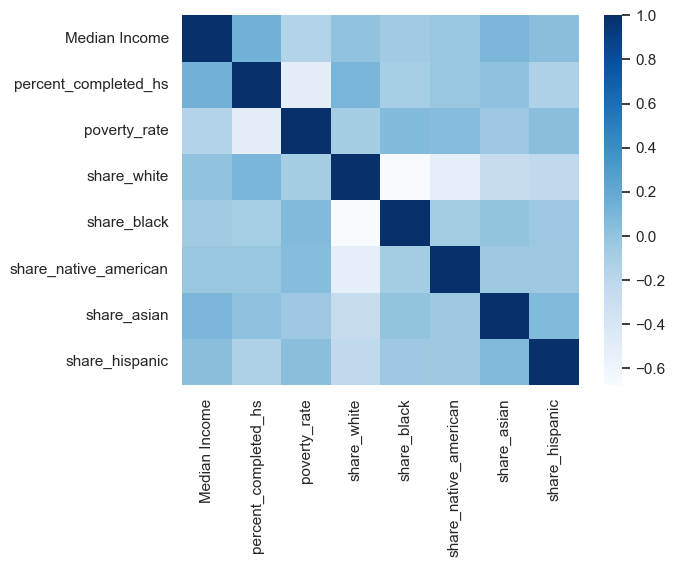

In [50]:
sns.heatmap(df_eda, cmap='Blues')

# EDA

<Axes: xlabel='Median Income', ylabel='percent_completed_hs'>

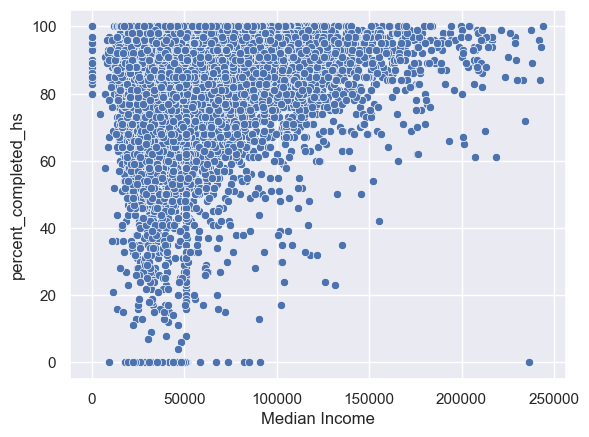

In [51]:
sns.scatterplot(df_country, x='Median Income', y='percent_completed_hs')

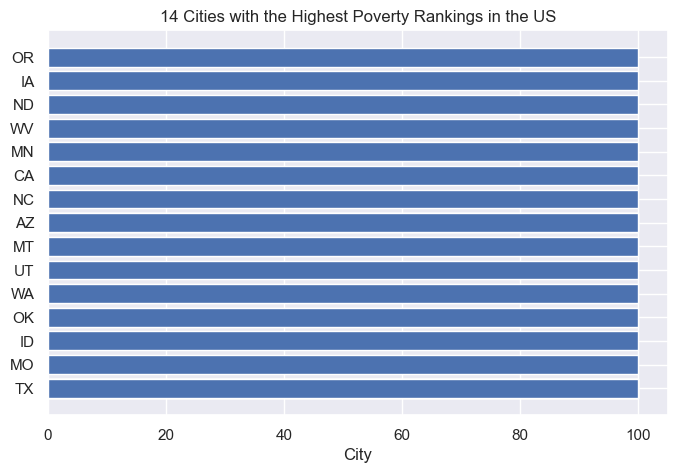

In [52]:
#df_poverty_city = df_country[df_country['Geographic Area']]
#df_sorted = df_poverty_city.sort_values(by='poverty_rate', ascending=False)
#df_sorted = df_sorted.head(15)

df = df_country.sort_values(by='poverty_rate', ascending=False)
df = df.head(30)

plt.figure(figsize=(8,5))
plt.barh(df['Geographic Area'], df['poverty_rate'])
plt.xlabel('City')
plt.title('14 Cities with the Highest Poverty Rankings in the US')
plt.show()

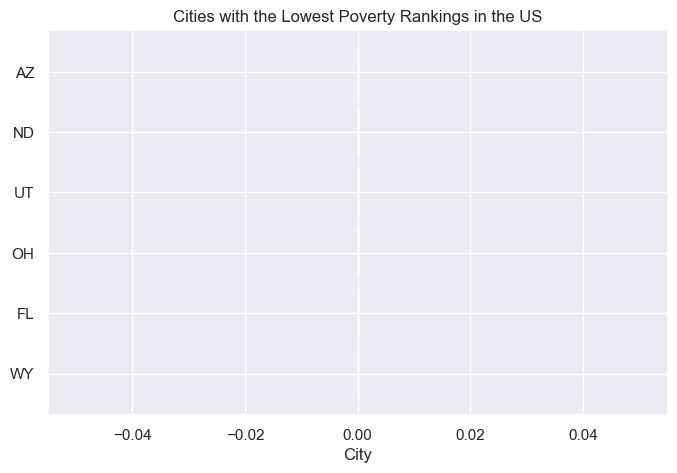

In [53]:
df = df_country.sort_values(by='poverty_rate', ascending=True)
df = df.head(50)

plt.figure(figsize=(8,5))
plt.barh(df['Geographic Area'], df['poverty_rate'])
plt.xlabel('City')
plt.title('Cities with the Lowest Poverty Rankings in the US')
plt.show()

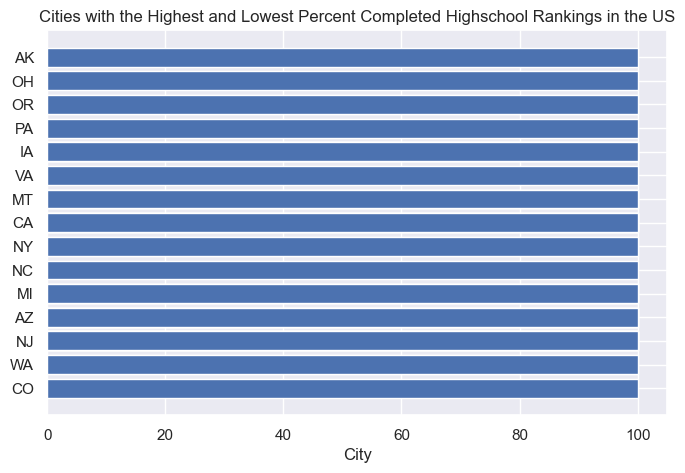

In [54]:
df = df_country.sort_values(by='percent_completed_hs', ascending=False)
df = df.head(50)

plt.figure(figsize=(8,5))
plt.barh(df['Geographic Area'], df['percent_completed_hs'])
plt.xlabel('City')
plt.title('Cities with the Highest and Lowest Percent Completed Highschool Rankings in the US')
plt.show()

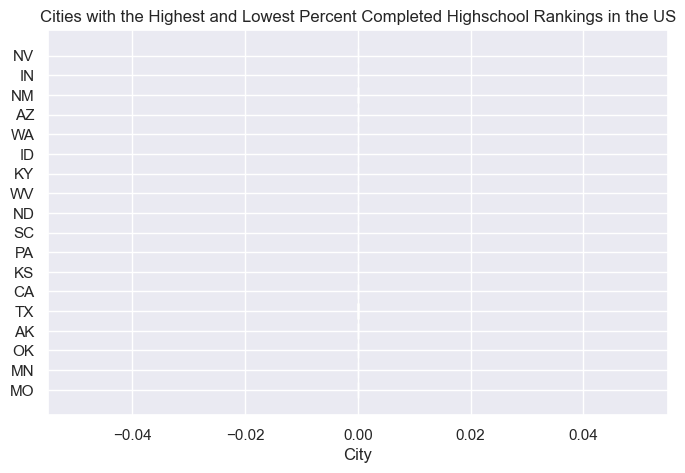

In [55]:
df = df_country.sort_values(by='percent_completed_hs', ascending=True)
df = df.head(50)

plt.figure(figsize=(8,5))
plt.barh(df['Geographic Area'], df['percent_completed_hs'])
plt.xlabel('City')
plt.title('Cities with the Highest and Lowest Percent Completed Highschool Rankings in the US')
plt.show()

In [56]:
# Highest n Lowest Poverty Rate
top_10_poverty = df_country.nlargest(15, 'poverty_rate')
bottom_10_poverty = df_country.nsmallest(15, 'poverty_rate')

# Highest n Lowest Highschool Graduated
top_10_graduated = df_country.nlargest(15, 'percent_completed_hs')
bottom_10_graduated = df_country.nsmallest(15, 'percent_completed_hs')

df_combined = pd.concat([top_10_poverty, bottom_10_poverty, top_10_graduated, bottom_10_graduated]).drop_duplicates().reset_index(drop=True)
df_combined.head()

,City,Geographic Area,Median Income,percent_completed_hs,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,Birch Creek CDP,AK,51076,0,100,14,0,85,0,0
1,Ferry CDP,AK,51076,100,100,98,0,0,1,0
2,Tat Momoli CDP,AZ,51076,0,100,73,0,3,0,38
3,Topock CDP,AZ,51076,100,100,69,5,2,2,41
4,Vaiva Vo CDP,AZ,51076,50,100,86,0,9,0,2


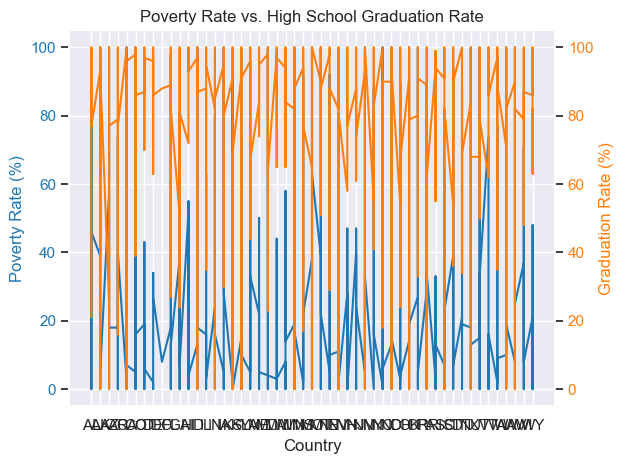

In [57]:
fig, ax1 = plt.subplots()

# Plotting Poverty Rate
ax1.set_xlabel('Country')
ax1.set_ylabel('Poverty Rate (%)', color='tab:blue')
ax1.plot(df_country['Geographic Area'], df_country['poverty_rate'], color='tab:blue', label='Poverty Rate')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis for Graduation Rate
ax2 = ax1.twinx()
ax2.set_ylabel('Graduation Rate (%)', color='tab:orange')
ax2.plot(df_country['Geographic Area'], df_country['percent_completed_hs'], color='tab:orange',  label='Graduation Rate')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Title and grid
plt.title('Poverty Rate vs. High School Graduation Rate')
fig.tight_layout()
plt.grid()
plt.show()

C:\Users\chesa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chesa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


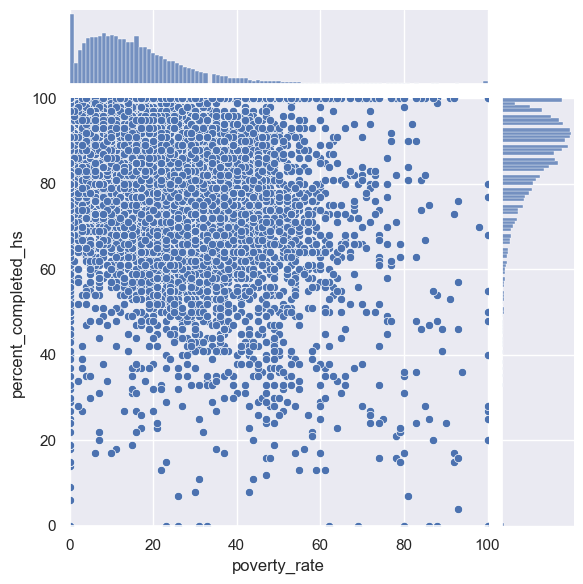

In [58]:
r = sns.jointplot(x="poverty_rate", y="percent_completed_hs", data=df_country,
                  kind="scatter",
                  xlim=(0, 100), ylim=(0, 100),
                  color="b")

<Axes: xlabel='poverty_rate', ylabel='percent_completed_hs'>

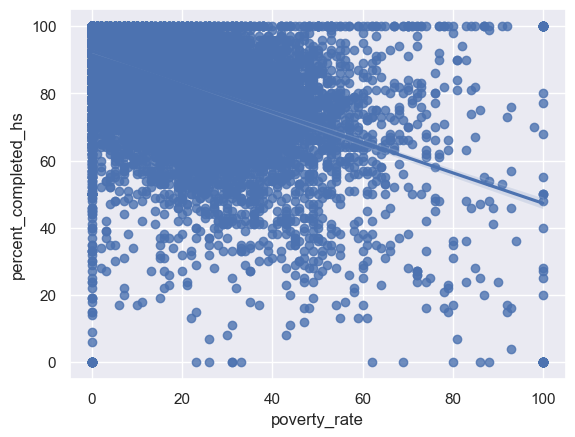

In [59]:
sns.regplot(
    data=df_country,
    x="poverty_rate", y="percent_completed_hs", 
)

In [60]:
#df_country.set_index(df_country['Geographic Area'], inplace=False)

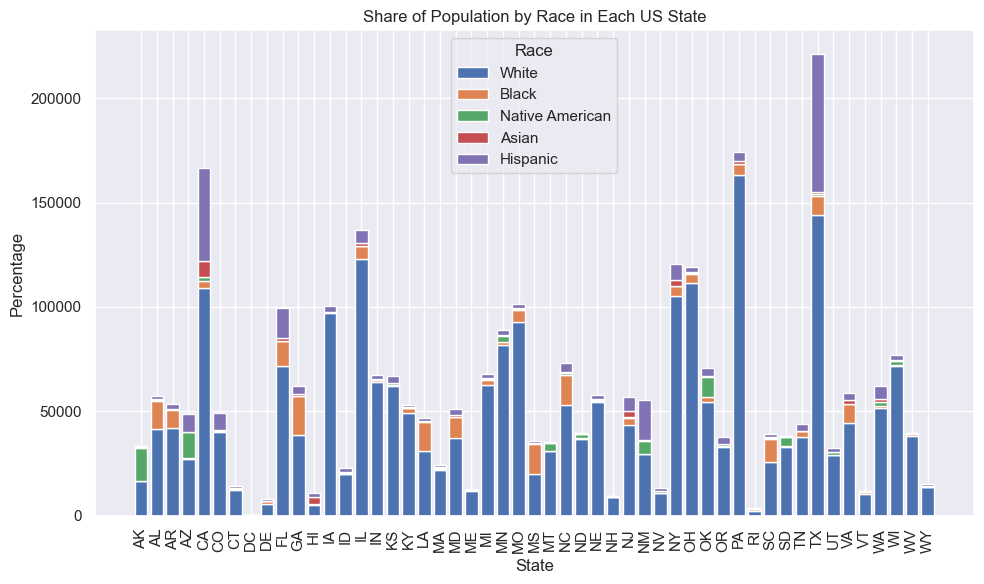

In [61]:
df_grouped = df_country.groupby('Geographic Area')[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].sum()

# Plot the bar chart with sub-sections
fig, ax = plt.subplots(figsize=(10, 6))
for i, race in enumerate(['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']):
    ax.bar(df_grouped.index, df_grouped[race], bottom=None if i == 0 else df_grouped.iloc[:, :i].sum(axis=1))

# Customize the plot
ax.set_xlabel('State')
ax.set_ylabel('Percentage')
ax.set_title('Share of Population by Race in Each US State')
ax.legend(['White', 'Black', 'Native American', 'Asian', 'Hispanic'], title='Race')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

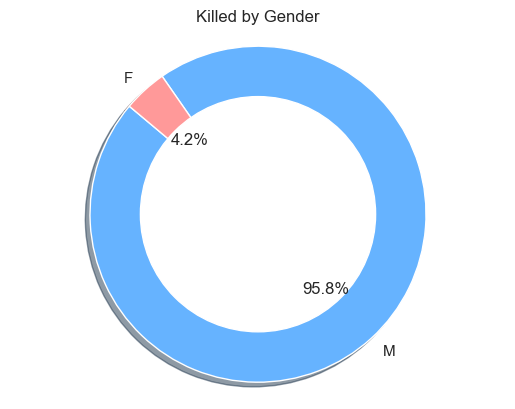

In [62]:
# Data
df_donut = df_police['gender'].value_counts()

# Konfigurasi plot
labels = ['M', 'F']
colors = ['#66b3ff','#ff9999']
explode = (0, 0)  # Pastikan jumlah nilai sesuai dengan jumlah label

# Membuat pie chart
plt.pie(df_donut, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Membuat lingkaran untuk donut
centre_circle = plt.Circle((0,0),0.70,fc='white')  # Lingkaran putih di tengah
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Menentukan aspek sama agar lingkaran tetap
plt.axis('equal')  
plt.title('Killed by Gender')
plt.show()

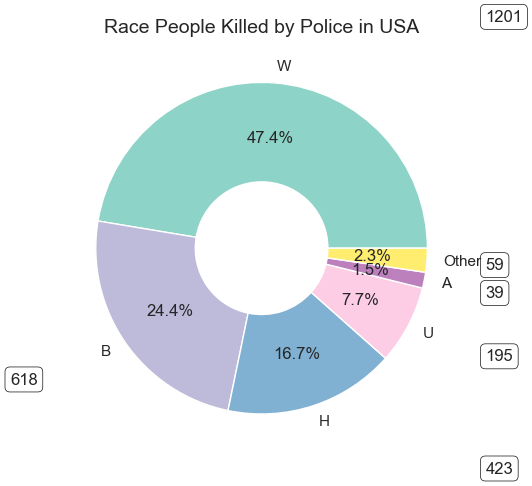

In [63]:
# Clean data
df_police['race'] = df_police['race'].fillna('Unknown').replace('', 'Unknown')

# Get top categories
donut_race = df_police['race'].value_counts()
donut_race_grouped = donut_race.nlargest(5)
donut_race_grouped['Other'] = donut_race.sum() - donut_race_grouped.sum()

# Create the donut chart
fig, ax = plt.subplots(figsize=(8, 5))

colors = plt.cm.Set3(np.linspace(0, 1, len(donut_race_grouped)))
wedges, texts, autotexts = ax.pie(donut_race_grouped.values, 
                                  labels=donut_race_grouped.index,
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  pctdistance=0.67,
                                  wedgeprops=dict(width=0.6))

# Add a circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.30, fc='white')
fig.gca().add_artist(centre_circle)

# Add value labels
bbox_props = dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.52)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(f'{donut_race_grouped.values[i]}', 
                xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Race People Killed by Police in USA", fontsize=14)
plt.tight_layout()
plt.show()

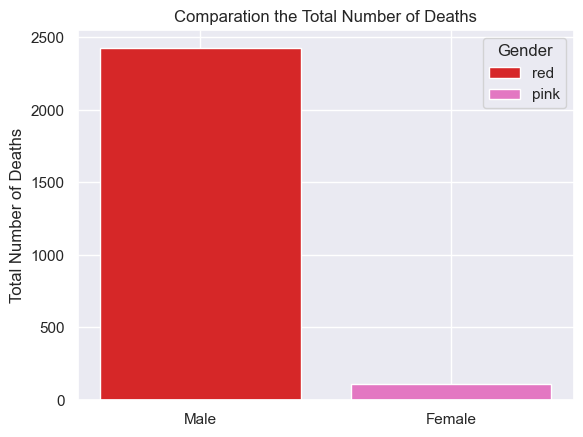

In [64]:
#Comparation the Total Number of Deaths of Male and Female
df_fatalities = df_police['gender'].value_counts()

fig, ax = plt.subplots()

gender = ['Male', 'Female']
bar_labels = ['red', 'pink']
bar_colors = ['tab:red', 'tab:pink']

ax.bar(gender, df_fatalities, label=bar_labels, color=bar_colors)

ax.set_ylabel('Total Number of Deaths')
ax.set_title('Comparation the Total Number of Deaths')
ax.legend(title='Gender')

plt.show()

<Axes: xlabel='gender', ylabel='age'>

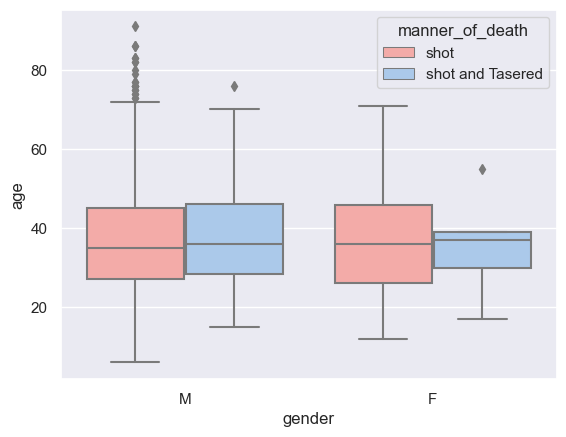

In [65]:
sns.set_theme(style="darkgrid", palette="pastel")

sns.boxplot(x=df_police['gender'], 
            y=df_police['age'], 
            hue=df_police['manner_of_death'],
            palette=["r", "b"],
            data=df_police)

In [66]:
df_police['armed'] = df_police['armed'].apply(lambda x: x if x in ['Unknown', 'unarmed', 'undetermined'] else 'gun')

Text(0, 0.5, 'Count')

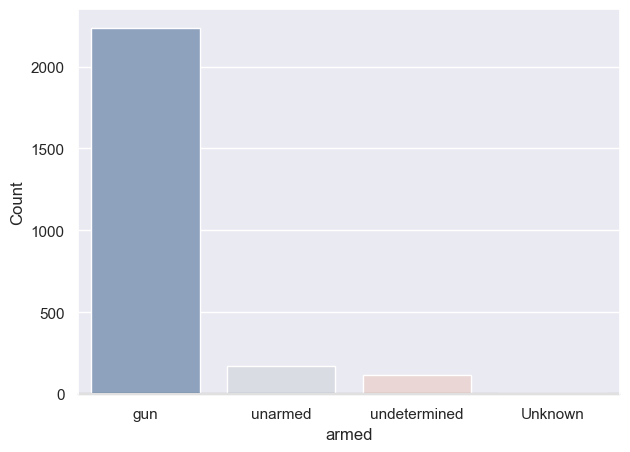

In [67]:
fig, ax1 = plt.subplots(1,1, figsize=(7, 5), sharex=True)

sns.countplot(x="armed", data=df_police, palette="vlag", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Count")

C:\Users\chesa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


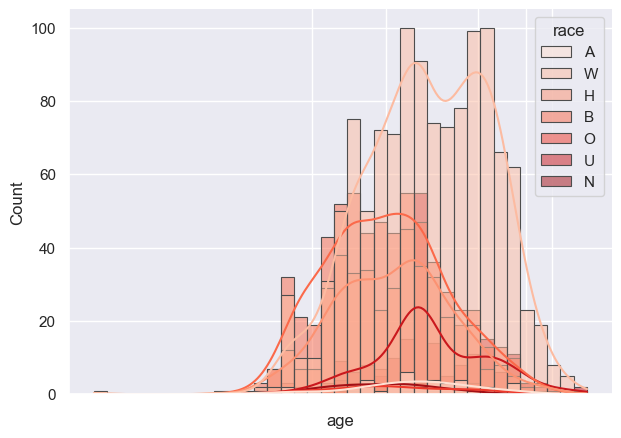

In [68]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(df_police,
    x=df_police.age, 
    hue="race",
    multiple="layer",
    palette="Reds",
    edgecolor=".3",
    linewidth=.8,
    log_scale=True, 
    kde=True, 
    stat='count',
)
ax.set_xticks([20, 30, 50, 65, 75])

C:\Users\chesa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

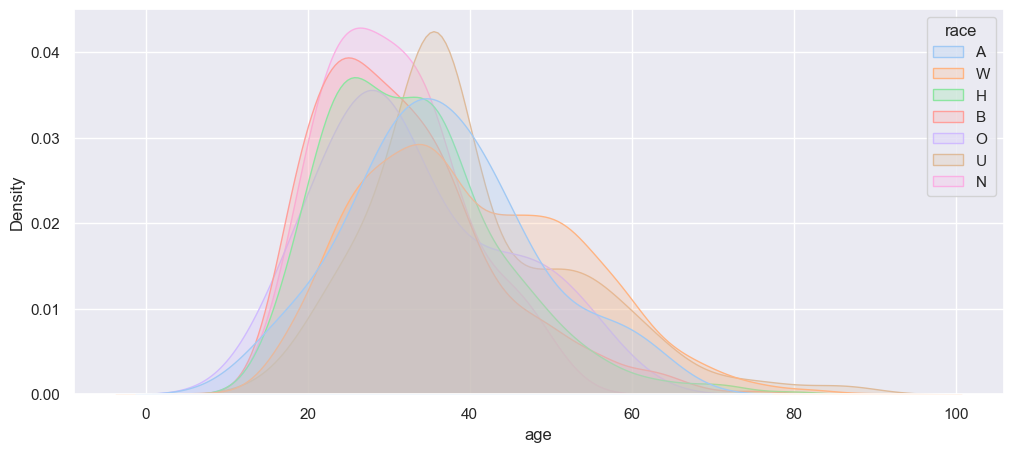

In [69]:
f, ax = plt.subplots(figsize=(12, 5))
ax.set_aspect("auto")

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=df_police,
    x=df_police.age,
    hue='race', 
    common_norm=False, 
    fill=True,
    thresh=.1,
)

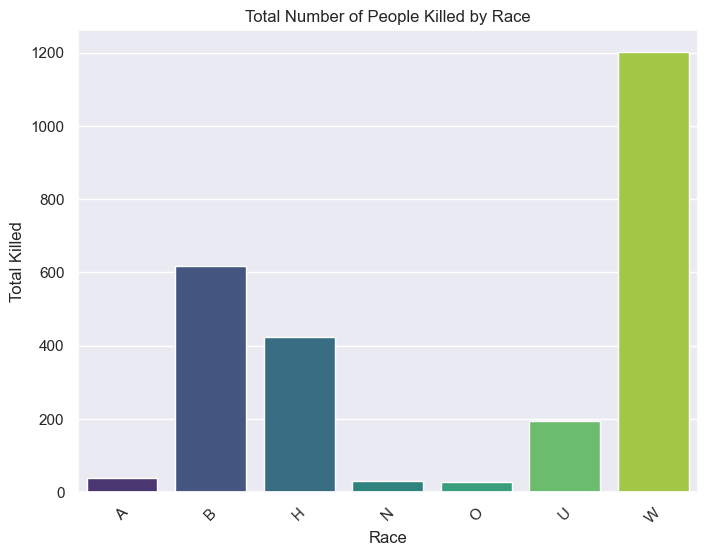

In [70]:
plt.figure(figsize=(8, 6))
sns.barplot(x='race', y='count', data=df_police.groupby('race').size().reset_index(name='count'), palette='viridis')
plt.title('Total Number of People Killed by Race')
plt.xlabel('Race')
plt.ylabel('Total Killed')
plt.xticks(rotation=45)
plt.show()

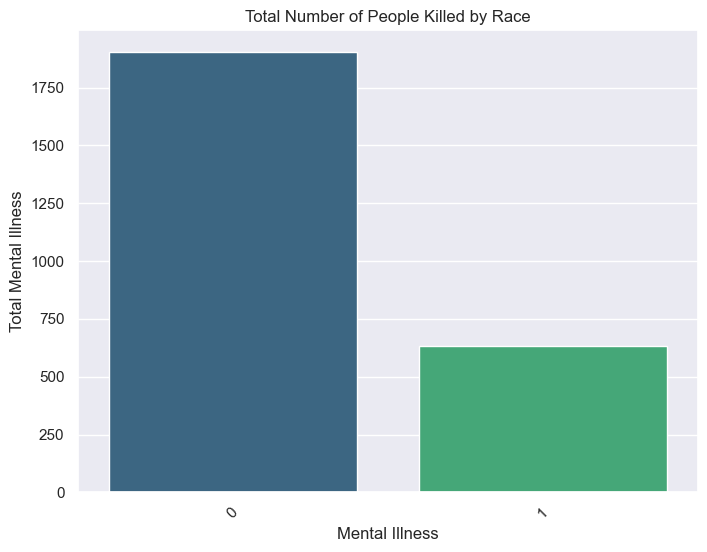

In [71]:
df_police['signs_of_mental_illness'] = df_police['signs_of_mental_illness'].astype(int)

plt.figure(figsize=(8, 6))
sns.barplot(x='signs_of_mental_illness', y='count', data=df_police.groupby('signs_of_mental_illness').size().reset_index(name='count'), palette='viridis')
plt.title('Total Number of People Killed by Race')
plt.xlabel('Mental Illness')
plt.ylabel('Total Mental Illness')
plt.xticks(rotation=45)
plt.show()

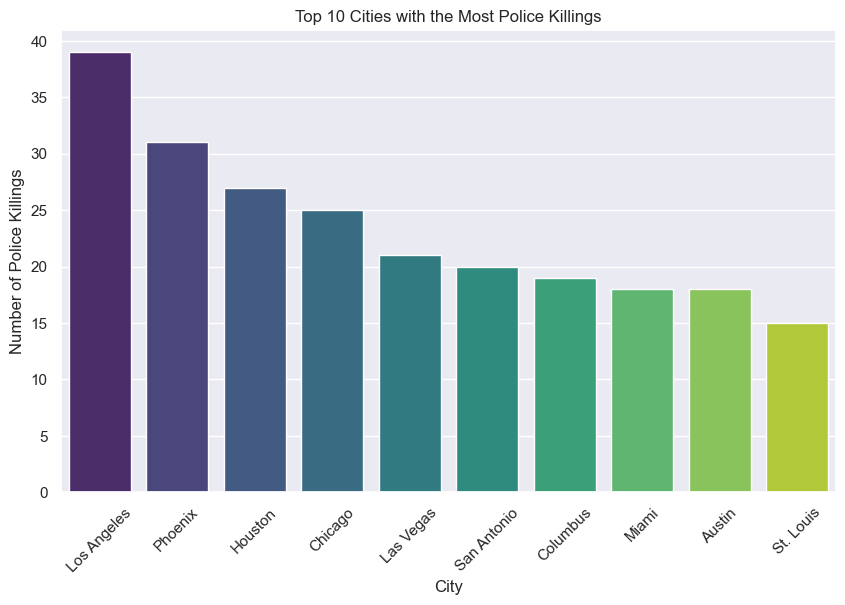

In [72]:
# Group the data by city and count the number of police killings
city_killings = df_police.groupby('city').size().reset_index(name='killings')

# Sort the data in descending order to get the top 10 cities
top_10_cities = city_killings.sort_values('killings', ascending=False).head(10)

# Create a bar chart to visualize the top 10 cities
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='killings', data=top_10_cities, palette='viridis')
plt.title('Top 10 Cities with the Most Police Killings')
plt.xlabel('City')
plt.ylabel('Number of Police Killings')
plt.xticks(rotation=45)
plt.show()

In [73]:
import folium
m = folium.Map(location=[43, -100], zoom_start=4)

# Assume you have a new dataset called `state_killings` with columns `state` and `killings`
folium.Choropleth(
    geo_data=open('us-states.json').read(),
    data=city_killings,
    columns=['city', 'killings'],
    key_on='feature.properties.name',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Police Killings by State'
).add_to(m)

m

In [74]:
df_police['month'] = df_police['date'].dt.month
df_police['year'] = df_police['date'].dt.year

In [75]:
df_police['month'].value_counts()

month
7     264
2     263
3     260
1     249
6     241
4     224
5     219
8     176
12    167
9     160
10    158
11    154
Name: count, dtype: int64

In [76]:
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

df_police['month'] = df_police['month'].map(month_names)

C:\Users\chesa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of labels (12).

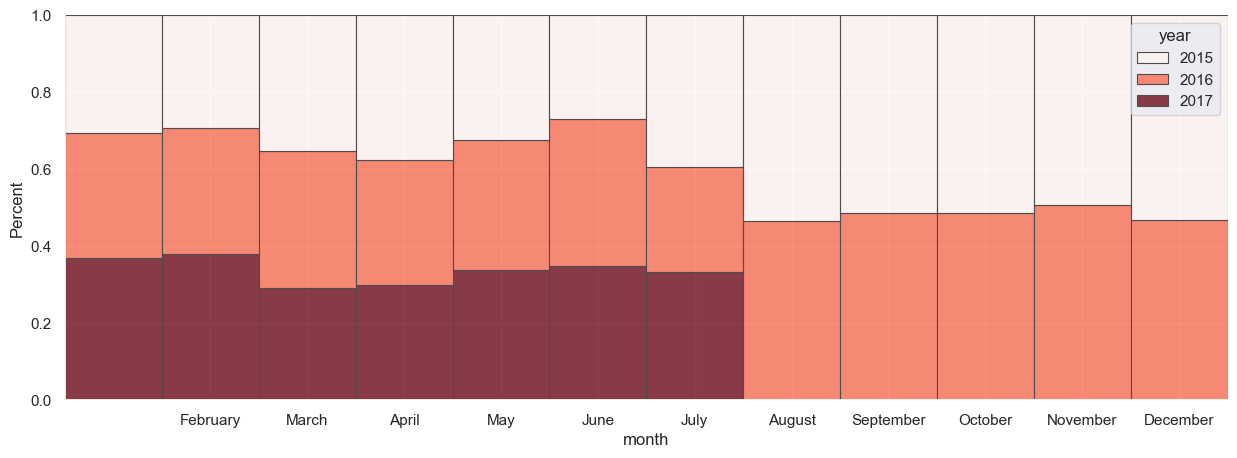

In [77]:
f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)

sns.histplot(df_police,
    x='month', 
    hue="year",
    multiple="fill",
    palette="Reds",
    edgecolor=".3",
    linewidth=.8,
    log_scale=False, 
    kde=False, 
    stat='percent',
)
ax.set_xticks(range(1, 12))  # Assuming months are numeric (1-12)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax.set_xlim(1, 12)
df_exm = df_police.replace([np.inf, -np.inf], np.nan, inplace=True)
df_exm
plt.show()

In [ ]:
#Taking the Data from dataframe
month_val = {'month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']}
month_val = pd.DataFrame(month_val)
month_total = df_police['month'].value_counts().reset_index()

# Create a bar chart to visualize the month with highest people killed
plt.figure(figsize=(8, 5))
sns.barplot(x='month', y='count', data=month_total, palette='afmhot')
plt.title('The Month with the highest people killed by Police ')
plt.xlabel('Month')
plt.ylabel('Number of Police Killings')
plt.xticks(rotation=45)
plt.show()